In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cálculo

Vamos usar Python para construir duas funções que você já conhece:
* a derivada
* a integral definida

### Derivada

Por definição,

$$
\frac{df}{\Delta x} = \lim_{\Delta x \to 0} \frac{f(x+h) - f(x)}{\Delta x}
$$

Tomar o limite quando $\Delta x\to 0$, na prática, equivale a escolher um $\Delta x$ pequenininho e calcular a fração

$$
\frac{f(x+\Delta x) - f(x)}{\Delta x}
$$

Vamos escolher 

$$
\Delta x = 0,000001
$$

Claro, que quanto menor, melhor. Mas 1 milionésimo já é bem pequenininho...

In [70]:
def derivada(f, x, Δx = 1e-6):
    dy = f(x+Δx) - f(x)
    dx = Δx
    return(dy/dx)

Vamos testar com $f(x)=3x^2$ em $x=3$. Sabemos que, nesse caso, $\frac{dy}{dx} = 6x$, ou seja, a derivada deve ser igual a 18.

In [71]:
def f(x):
    return(3*x**2)

In [72]:
derivada(f, 3)

18.000003002782705

In [73]:
#Essa diferença é um erro de aproximação do numpy
np.isclose(_, 18)

True

## Integral definida

![area-como-soma](https://www.maa.org/sites/default/files/images/cms_upload/Integre_area37115.gif)

$$
\int_{a}^{b} f(x)dx = \lim_{\Delta x \to 0} \sum_{a}^{b} f(x)\Delta x = \\
\text{Soma das áreas de vários retângulos de altura} f(x) \text{ e base}  \Delta x \to 0
$$


In [74]:
def integral(f, a, b, Δx = 1e-6):
    posicoes_dos_retangulos = np.arange(a, b, Δx)
    alturas_dos_retangulos = f(posicoes_dos_retangulos) #vetorização!
    áreas_dos_retangulos = alturas_dos_retangulos * Δx
    area_sob_a_curva = sum(áreas_dos_retangulos)
    return(area_sob_a_curva)

Vamos testar calculando a área embaixo da curva $f(x) = 3x^2$ entre $x=1$ e $x=2$. O resultado esperado é

$$
\int_1^2 3x^2 dx = \left[3\frac{x^3}{3}\right]_1^2= \left[x^3\right]_1^2 = 2^3 - 1^3 = 8-1=7 
$$



In [75]:
def f(x):
    return(3 * x**2)

In [76]:
%%time
integral(f, 1, 2)

Wall time: 195 ms


6.999995499589405

In [77]:
np.isclose(_, 7)

True

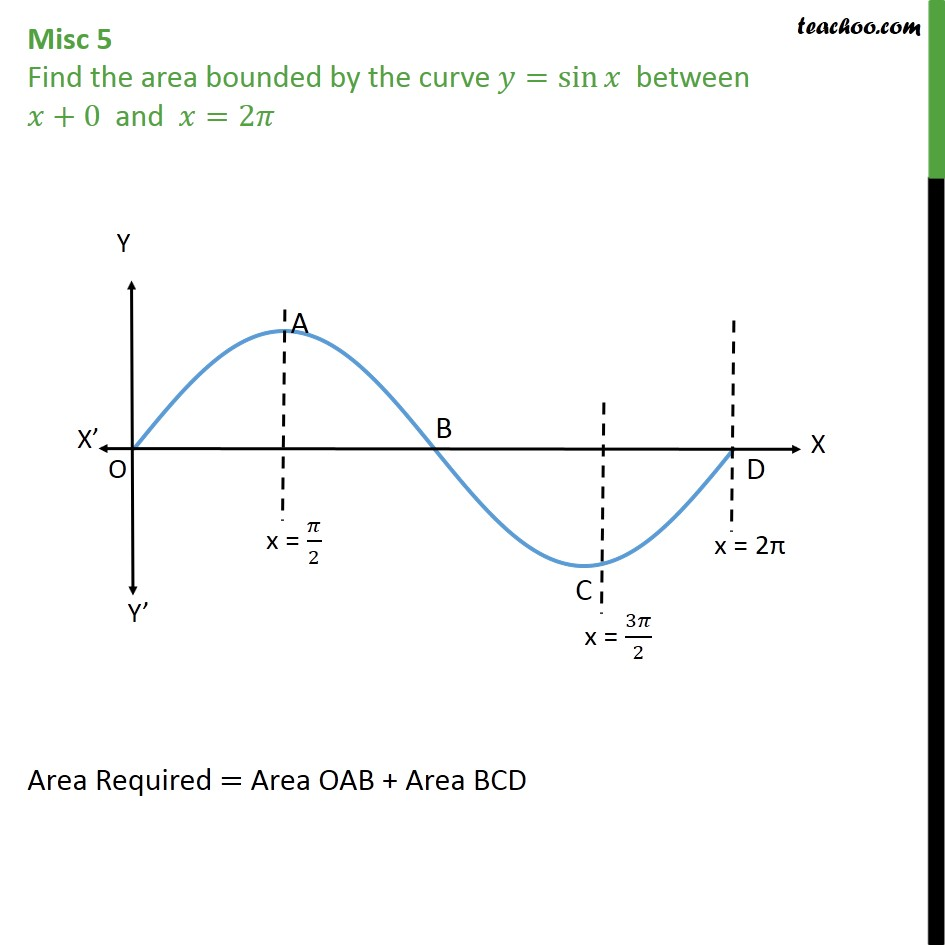

In [78]:
from math import pi

In [79]:
def f(x):
    return(np.sin(x))

In [80]:
integral(f, 0, 2*pi)

-1.619066380859121e-13

In [81]:
np.isclose(_, 0)

True

In [82]:
2 * integral(f, 0, pi)

3.999999999999901

## Integrais usando o valor médio (Método de Monte Carlo)

$$
\text{valor médio de} f(x) = \frac{\int_a^b f(x)dx}{b-a}
$$

Logo

$$
\int_a^b f(x)dx = (b-a) \times \text{valor médio de} f(x)
$$

In [59]:
def integral_pelo_valor_medio(f, a, b, Npontos=1e6):
    numeros_aleatorios_entre_0_e_1 = np.random.random(int(Npontos))
    numeros_aleatorios_entre_a_e_b = a + (b-a) * numeros_aleatorios_entre_0_e_1 
    #O menor valor possível (se o número aleatório do lado direito for 0), será _a_.
    #O maior valor possível (se o número aleatório do lado direito for 1), será _a + (b-a) = b_
    #Logo, estamos criando números aleatórios entre _a_ e _b_
    #Valor da função nesses pontos:
    y = f(numeros_aleatorios_entre_a_e_b) #-- vetorização
    #Valor médio da função:
    valor_medio = y.mean()
    return((b-a) * valor_medio)
    

Vamos tomar como exemplo $\int_1^2 3x^2 dx$, que é 7, como já vimos.

In [60]:
def f(x):
    return(3 * x**2)

In [61]:
integral_pelo_valor_medio(f,1,2)

7.000699625750337

Como a função usa números aleatórios, cada vez que rodamos temos um número um pouquinho diferente:

In [62]:
integral_pelo_valor_medio(f,1,2)

6.9960521284601755

Mas nada muito grave:

In [68]:
resultados_integral = pd.Series([],dtype='float64')
for i in range(1000):
    resultados_integral[i] = integral_pelo_valor_medio(f,1,2)
resultados_integral.describe()

count    1000.000000
mean        6.999921
std         0.002620
min         6.991906
25%         6.998058
50%         6.999999
75%         7.001664
max         7.009015
dtype: float64

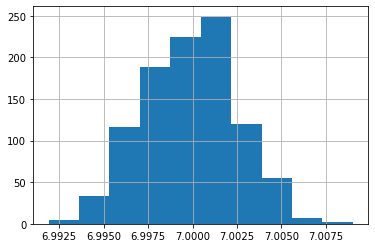

In [69]:
resultados_integral.hist();